<a href="https://colab.research.google.com/github/Chloe0704/Admission_Visualization/blob/master/HW3_AdmissionReason.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from ggplot import *

%matplotlib inline

In [0]:
adm = pd.read_csv("https://raw.githubusercontent.com/Chloe0704/Dataset-files/master/Admission_Predict.csv")
adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
adm.rename(columns = {'Serial No.': 'SerialNo', 'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'University Rating': 'UniversityRating', 'LOR ': 'LOR', 'Chance of Admit ': 'Chance'}, inplace=True)
adm.columns

Index(['SerialNo', 'GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance'],
      dtype='object')

In [0]:
quality = adm["Chance"].values
category = []
for num in quality:
    if num<0.6:
        category.append("Low")
    elif num>0.8:
        category.append("High")
    else:
        category.append("Mid")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


High    235
Mid     132
Low      33
Name: category, dtype: int64

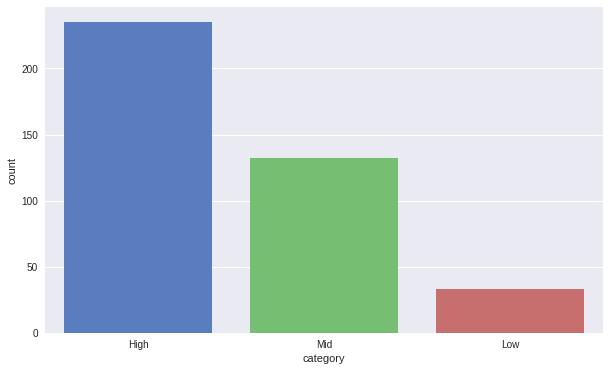

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

In [0]:
category = pd.DataFrame(data=category, columns=["category"])
adm = pd.concat([adm,category],axis=1)
adm.head()

,SerialNo,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance,category
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Mid
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Mid
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Mid
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Mid


In [0]:
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
SerialNo            400 non-null int64
GRE                 400 non-null int64
TOEFL               400 non-null int64
UniversityRating    400 non-null int64
SOP                 400 non-null float64
LOR                 400 non-null float64
CGPA                400 non-null float64
Research            400 non-null int64
Chance              400 non-null float64
category            400 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 31.3+ KB


In [0]:
adm.describe()

,SerialNo,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


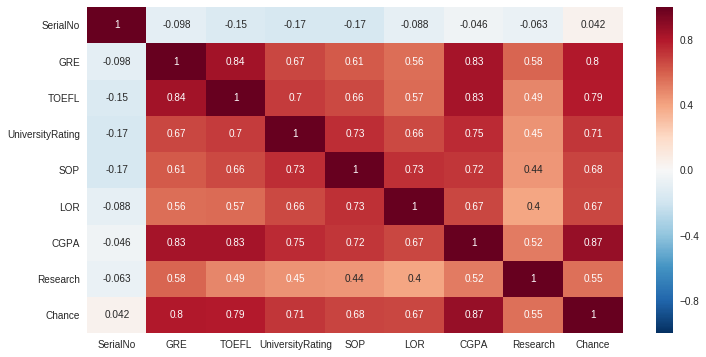

In [0]:
plt.figure(figsize=(12,6))
sns.heatmap(adm.corr(),annot=True)

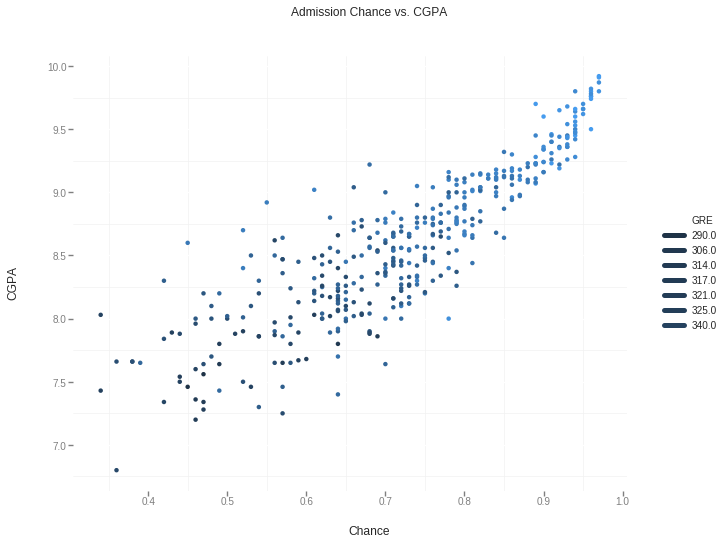

<ggplot: (8762507072057)>

In [0]:
ggplot(aes(x='Chance', y='CGPA',color='GRE'), data=adm) +\
    geom_point(color=adm["GRE"]) +\
    theme_bw() +\
    xlab("Chance") +\
    ylab("CGPA") +\
    ggtitle("Admission Chance vs. CGPA")

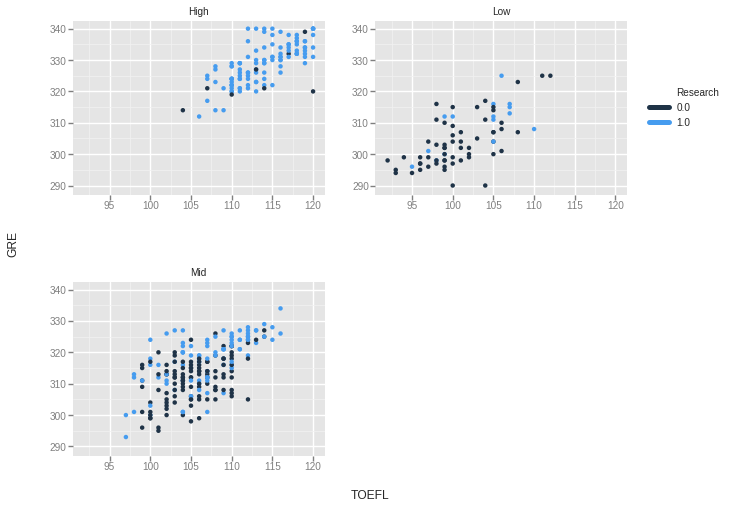

<ggplot: (8762504286230)>

In [0]:
ggplot(adm , aes(x = 'TOEFL' , y = 'GRE',color = "Research")) +\
  geom_point( alpha=1) +\
  facet_wrap('category')

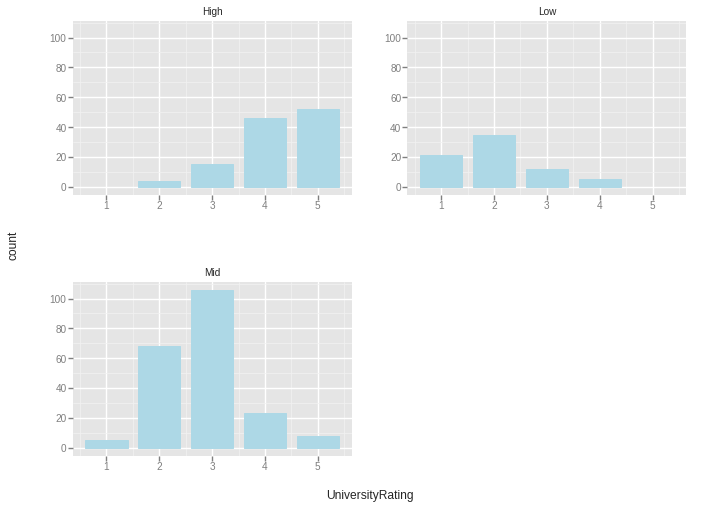

<ggplot: (8762500395314)>

In [0]:
ggplot(adm, aes(x='UniversityRating'))+geom_bar(fill='lightblue', alpha=1)+labs(y='count')+\
facet_wrap('category')

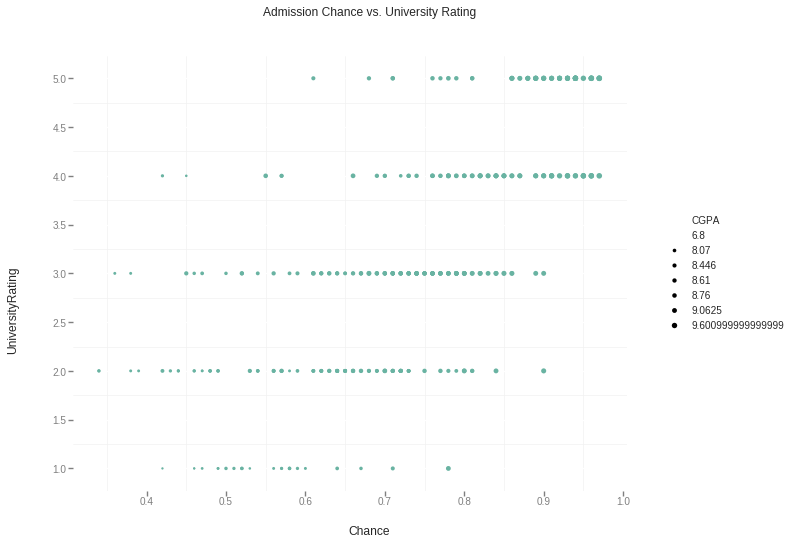

<ggplot: (-9223363274353969639)>

In [0]:
ggplot(aes(x='Chance', y='UniversityRating',size = "CGPA"), data=adm) +\
    geom_point(color="#69b3a2") +\
    theme_bw() +\
    xlab("Chance") +\
    ylab("UniversityRating") +\
    ggtitle("Admission Chance vs. University Rating")

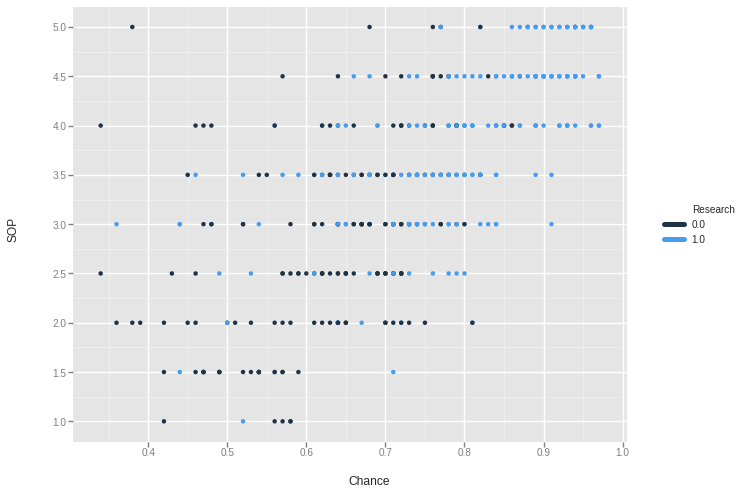

<ggplot: (8762501112559)>

In [0]:
ggplot(adm , aes(x = 'Chance' , y = 'SOP',color = "Research")) +\
  geom_point( alpha=1)
#  facet_wrap('category')

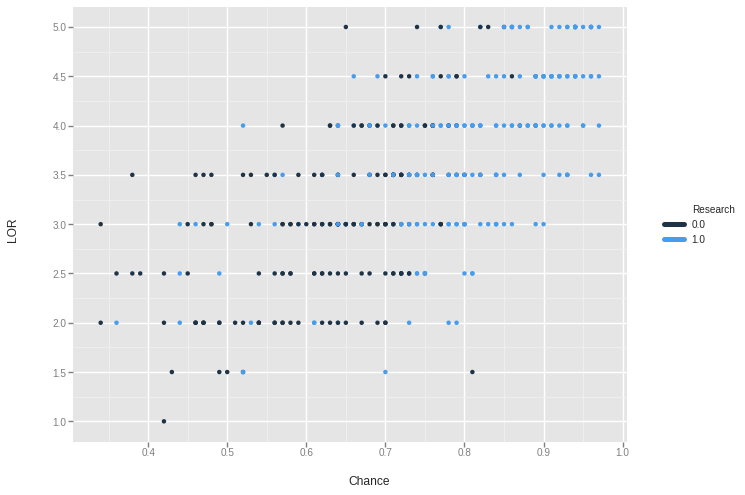

<ggplot: (-9223363274354143961)>

In [0]:
ggplot(adm , aes(x = 'Chance' , y = 'LOR',color = "Research")) +\
  geom_point( alpha=1)
#  facet_wrap('category')

In [0]:
features = adm.drop(columns='Chance')
features = adm.drop(columns='category')
targets = pd.DataFrame(adm['Chance'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)